In [ ]:
import pandas as pd
# df= pd.read_csv('/content/df_temp_with_encoding_ungrouped2.csv')
df=pd.read_csv('/content/temp_dec2.csv')
# df = pd.read_csv('/content/temp_dec3.csv')
df.head()

,status,number_of_stories,age,roof_mwfrs_enc,wall_cladding_enc,roof_system_enc,roof_cover_enc,foundation_type,wall_structure,soffit_type,large_door_present
0,4.0,1.0,23.0,16.0,0.0,65.0,117.0,7.0,28.0,1.0,0.0
1,1.0,1.0,32.0,16.0,16.0,67.0,10.0,7.0,28.0,5.0,1.0
2,3.0,1.0,50.0,16.0,16919.0,62.0,121.0,7.0,28.0,4.0,0.0
3,2.0,1.0,78.0,16.0,16.0,65.0,121.0,7.0,21.0,3.0,0.0
4,1.0,1.0,63.0,16.0,10.0,65.0,6117.0,7.0,21.0,4.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              1094 non-null   float64
 1   number_of_stories   1094 non-null   float64
 2   age                 1094 non-null   float64
 3   roof_mwfrs_enc      1094 non-null   float64
 4   wall_cladding_enc   1094 non-null   float64
 5   roof_system_enc     1094 non-null   float64
 6   roof_cover_enc      1094 non-null   float64
 7   foundation_type     1094 non-null   float64
 8   wall_structure      1094 non-null   float64
 9   soffit_type         1094 non-null   float64
 10  large_door_present  1094 non-null   float64
 11  predictions         1094 non-null   int64  
 12  y_hat_minus1        1094 non-null   int64  
 13  y_hat_plus1         1094 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 119.8 KB


In [ ]:
!pip install xgboost
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 32 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['number_of_stories', 'age', 'roof_mwfrs_enc',
       'wall_cladding_enc', 'roof_system_enc', 'roof_cover_enc',
       'foundation_type', 'wall_structure', 'soffit_type',
       'large_door_present']] = scaler.fit_transform(df[['number_of_stories', 'age', 'roof_mwfrs_enc',
       'wall_cladding_enc', 'roof_system_enc', 'roof_cover_enc',
       'foundation_type', 'wall_structure', 'soffit_type',
       'large_door_present']])#,'y_hat_minus1','y_hat_plus1']])

# df[['number_of_stories', 'age', 'ff_elevation', 'wall_clad',
#        'roof_cov']] = scaler.fit_transform(df[['number_of_stories', 'age', 'ff_elevation', 'wall_clad',
#        'roof_cov']])

In [ ]:
from xgboost.core import Booster
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score

# split data into X and y
# X = df[['number_of_stories', 'age', 'ff_elevation', 'wall_clad',
#        'roof_cov']]
X = df[['number_of_stories','age','roof_mwfrs_enc','wall_cladding_enc','roof_system_enc','roof_cover_enc','foundation_type','wall_structure','soffit_type','large_door_present']]#,'predictions','list_minus']]
Y = df[['status']]

# split data into train and test sets
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier(learning_rate=0.01, n_estimators=600, nthread=2,booster='gbtree',)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(predictions,y_test )
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(predictions,y_test))

Accuracy: 52.05%
[[ 5  1  0  0  1]
 [ 8 26 17  5  3]
 [ 3 16 25 10  6]
 [ 1  1  3 15  6]
 [ 9  2  6  7 43]]


### Cross class classification analysis
##### Should be run after creating Stat_comp column 

In [ ]:
m1 = []
for i in y_pred:
  temp = []
  temp.append(i-1)
  temp.append(i)
  temp.append(i+1)
  m1.append(temp)

y_test = y_test['status'].tolist()
cnt = 0
for i in range (0,len(y_test)):
  if y_test[i] in m1[i]:
    cnt+=1

(cnt/len(y_test))*100



67.57990867579909

### Predicting on whole model

In [ ]:
y_pred = model.predict(X)

In [ ]:
len(y_pred)

1094

In [ ]:
# df['new_col'] = np.array(mylist)
import numpy as np
df['predictions'] = np.array(y_pred)
df

,status,number_of_stories,age,roof_mwfrs_enc,wall_cladding_enc,roof_system_enc,roof_cover_enc,foundation_type,wall_structure,soffit_type,large_door_present,predictions
0,4.0,0.04,0.194915,8.600093e-09,0.000000,0.000681,0.000999,0.466667,0.777778,0.2,0.0,2
1,1.0,0.04,0.271186,8.600093e-09,0.000099,0.000703,0.000085,0.466667,0.777778,1.0,1.0,1
2,3.0,0.04,0.423729,8.600093e-09,0.104228,0.000648,0.001033,0.466667,0.777778,0.8,0.0,3
3,2.0,0.04,0.661017,8.600093e-09,0.000099,0.000681,0.001033,0.466667,0.583333,0.6,0.0,2
4,1.0,0.04,0.533898,8.600093e-09,0.000062,0.000681,0.052228,0.466667,0.583333,0.8,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1089,3.0,0.08,0.033898,9.999970e-04,0.000062,0.068769,0.000999,0.466667,0.583333,1.0,0.0,3
1090,4.0,0.04,0.008475,9.999970e-04,0.000062,0.000703,0.000162,0.466667,0.583333,1.0,0.0,4
1091,4.0,0.04,0.008475,9.999983e-04,0.000062,0.000703,0.000162,0.466667,0.583333,1.0,0.0,4
1092,0.0,0.04,0.008475,9.999970e-04,0.000062,0.000703,0.000213,0.466667,0.666667,0.2,0.0,4


In [ ]:
df['y_hat_minus1'] = df['predictions']-1
df['y_hat_plus1'] = df['predictions']+1

In [ ]:
list_minus = []
for i in range (0,len(df)):
  if df.status[i] in df.stat_comp[i]:
    list_minus.append(df.status[i])
  else:
    list_minus.append(df.predictions[i])
df['list_minus'] = list_minus

In [ ]:
list_plus = []
for i in range (0,len(df)):
  if df.status[i] in df.stat_comp[i]:
    list_plus.append(df.status[i])
  else:
    list_plus.append(df.predictions[i])
df['list_plus'] = list_plus

In [ ]:
# evaluate predictions
accuracy = accuracy_score(df.status, df.y_hat_plus1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(df.status, df.y_hat_plus1))

Accuracy: 11.71%
[[  0 133  87  30   6  36]
 [  0  28 512  96  14  73]
 [  0  24 146 259  13  70]
 [  0   7  62  55  81  70]
 [  0   6  43  28  30 303]
 [  0   0   0   0   0   0]]


In [ ]:
tr1 = df.status.tolist()
tr2  = df.y_hat_minus1.tolist()

In [ ]:
df.head()

,status,number_of_stories,age,roof_mwfrs_enc,wall_cladding_enc,roof_system_enc,roof_cover_enc,foundation_type,wall_structure,soffit_type,large_door_present,predictions,y_hat_minus1,stat_comp,list_minus,y_hat_plus1,list_plus
0,4.0,0.04,0.194915,8.600093e-09,0.000000,0.000681,0.000999,0.466667,0.777778,0.2,0.0,2,1,"[2, 3]",2.0,3,2.0
1,1.0,0.04,0.271186,8.600093e-09,0.000099,0.000703,0.000085,0.466667,0.777778,1.0,1.0,1,0,"[1, 2]",1.0,2,1.0
2,3.0,0.04,0.423729,8.600093e-09,0.104228,0.000648,0.001033,0.466667,0.777778,0.8,0.0,3,2,"[3, 4]",3.0,4,3.0
3,2.0,0.04,0.661017,8.600093e-09,0.000099,0.000681,0.001033,0.466667,0.583333,0.6,0.0,2,1,"[2, 3]",2.0,3,2.0
4,1.0,0.04,0.533898,8.600093e-09,0.000062,0.000681,0.052228,0.466667,0.583333,0.8,0.0,2,1,"[2, 3]",1.0,3,2.0


In [ ]:
set_status = []
for i in range (0,len(df)):
  temp_list = []
  temp_list.append(df.y_hat_minus1[i])
  temp_list.append(df.predictions[i])
  temp_list.append(df.y_hat_plus1[i])
  set_status.append(temp_list)
df['stat_comp'] = set_status



In [ ]:
df.head()

,status,number_of_stories,age,roof_mwfrs_enc,wall_cladding_enc,roof_system_enc,roof_cover_enc,foundation_type,wall_structure,soffit_type,large_door_present,predictions,y_hat_minus1,y_hat_plus1,stat_comp,list_minus,list_plus
0,4.0,0.04,0.194915,8.600093e-09,0.000000,0.000681,0.000999,0.466667,0.777778,0.2,0.0,2,1,3,"[1, 2, 3]",2.0,2.0
1,1.0,0.04,0.271186,8.600093e-09,0.000099,0.000703,0.000085,0.466667,0.777778,1.0,1.0,1,0,2,"[0, 1, 2]",1.0,1.0
2,3.0,0.04,0.423729,8.600093e-09,0.104228,0.000648,0.001033,0.466667,0.777778,0.8,0.0,3,2,4,"[2, 3, 4]",3.0,3.0
3,2.0,0.04,0.661017,8.600093e-09,0.000099,0.000681,0.001033,0.466667,0.583333,0.6,0.0,2,1,3,"[1, 2, 3]",2.0,2.0
4,1.0,0.04,0.533898,8.600093e-09,0.000062,0.000681,0.052228,0.466667,0.583333,0.8,0.0,2,1,3,"[1, 2, 3]",1.0,1.0


In [ ]:
cnt = 0

for k in range (0,len(df.status)):
  if df.status[k] in df.stat_comp[k]:
    cnt+=1
cnt

997

In [ ]:
(cnt/len(df))*100

91.13345521023766

In [ ]:
cnt = 0
for k in range (0,len(df.status)):
   if df.status[k]== df.y_hat_plus1[k]:
     cnt+=1
(cnt/len(df))*100

5.6672760511883

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


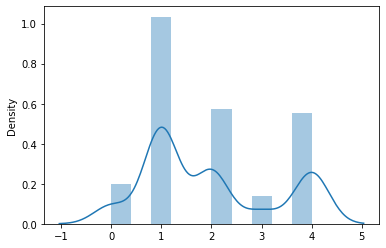

In [ ]:
import seaborn as sns
sns.distplot(y_hat_plus1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


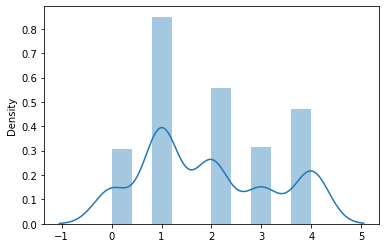

In [ ]:
sns.distplot(y_test)

In [ ]:
y_test.value_counts()

status
1         248
2         163
4         137
3          92
0          90
dtype: int64

In [ ]:
def freq(lst):
    d = {}
    for i in lst:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d
freq(predictions)

{1: 302, 2: 167, 4: 162, 0: 58, 3: 41}

In [ ]:
import numpy as np

addone=[]
for i in predictions:
  if i==1:
    i+=2
    addone.append(i)
  else:
    addone.append(i)
addone=np.array(addone)

In [ ]:
y_pred1 = y_pred+1
# y_pred=y_pred.tolist()
# # for i in y_pred:
# #   if i==1:
# #     i +=1
# #   else:
# #     i_=
# y_pred1= [x+1 for x in y_pred if x!=5]
# y_pred1

In [ ]:

accuracy = accuracy_score(addone,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(addone,y_test))

Accuracy: 29.45%
[[ 13  13   8   1   1]
 [  0   0   0   0   0]
 [ 12  55  56  21  17]
 [ 48 154  80  51  24]
 [ 17  26  19  19  95]]


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.21      0.27        58
           1       0.52      0.64      0.57       152
           2       0.35      0.29      0.32       100
           3       0.57      0.21      0.30        58
           4       0.49      0.77      0.60        75

    accuracy                           0.47       443
   macro avg       0.46      0.42      0.41       443
weighted avg       0.47      0.47      0.45       443



In [ ]:
X = df[['status']]
Y = df[['list_minus']]

# split data into train and test sets
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print(classification_report(y_test, X_test))

              precision    recall  f1-score   support

         0.0       0.50      0.87      0.63        15
         1.0       0.91      0.63      0.74        67
         2.0       0.55      0.60      0.57        47
         3.0       0.59      0.73      0.66        30
         4.0       0.73      0.72      0.72        60

    accuracy                           0.68       219
   macro avg       0.66      0.71      0.67       219
weighted avg       0.71      0.68      0.68       219



In [ ]:
X = df[['status']]
Y = df[['list_plus']]

# split data into train and test sets
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print(classification_report(y_test, X_test))

              precision    recall  f1-score   support

         0.0       0.19      0.83      0.31         6
         1.0       0.59      0.63      0.61        43
         2.0       0.82      0.63      0.71        67
         3.0       0.68      0.83      0.75        30
         4.0       0.83      0.67      0.74        73

    accuracy                           0.68       219
   macro avg       0.62      0.72      0.62       219
weighted avg       0.74      0.68      0.70       219



In [ ]:
y_test


,list_minus
200,1.0
900,0.0
578,4.0
90,2.0
639,0.0
...,...
495,1.0
766,0.0
866,0.0
35,2.0


## with KFold

In [ ]:
from xgboost.core import Booster
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score

# split data into X and y
X = df[['number_of_stories',	'age',	'ff_elevation',	'wc_encoded',	'roof_encoded']]
Y = df[['status']]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier(learning_rate=0.01, n_estimators=600, nthread=2,booster='gbtree')

kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# print(confusion_matrix(y_pred,y_test))

Accuracy: 37.25% (3.35%)


## PCA Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost.core import Booster
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score

features = list(df.columns[1:])

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['status']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=4)
#pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5', 'principal component 6','principal component 7','principal component 8'])
finalDf = pd.concat([principalDf, df[['status']]], axis = 1)


# split data into X and y
X = finalDf[['principal component 1', 'principal component 2','principal component 3','principal component 4']]
#X = finalDf[['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5', 'principal component 6','principal component 7','principal component 8']]
Y = finalDf[['status']]

# split data into train and test sets
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier(learning_rate=0.01, n_estimators=600, nthread=2,booster='gbtree')
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_pred,y_test))